In [28]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [29]:
#Credenciales para el acceso a la API
client = '07953c61b57244fb98e14123f362c5f4' #ingresar clave cliente propia
client_secret = 'd30d366325854a308dad18fcfaa4ae3e' #ingresar clave cliente secreta propia

In [30]:
client_credentials_manager = SpotifyClientCredentials(client_id=client, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Vamos a crear una funcion que nos devuelva el ID del artista solicitado

In [31]:
def obtenerID(artista):
    results = sp.search(q=artista, limit=1, type='artist')
    return results['artists']['items'][0]['id']

#Vamos a probar su funcionalidad

print(obtenerID('Spinetta'))

1MuQ2m2tg7naeRGAOxYZer


A la par que creamos una funcion que nos entregue información relevante sobre el artista, vamos a confirmar que el ID es correcto

In [32]:
def obtenerData(artista_id):
    canciones_data = []
    
    albumes = sp.artist_albums(artista_id, album_type='album')
    singles = sp.artist_albums(artista_id, album_type='single')
    
    for album in albumes['items'] + singles['items']:
        album_nombre = album['name']
        album_tipo = {'album':'Álbum', 'single':'Single'}[album['album_type']]
        album_año = album['release_date'].split('-')[0]
        
        tracks = sp.album_tracks(album['id'])

        for track in tracks['items']:
            cancion_nombre = track['name']
            cancion_artistas = ', '.join([t['name'] for t in track['artists']])
            cancion_duracion = round(track['duration_ms'] / 60000, 2)
            cancion_popularidad = sp.track(track['id'])['popularity']
            
            
            canciones_data.append([album_nombre, album_tipo, album_año, cancion_nombre, cancion_artistas, cancion_duracion, cancion_popularidad])
            
    return pd.DataFrame(canciones_data, columns=['Álbum', 'Tipo', 'Año', 'Canción', 'Artistas', 'Duración', 'Popularidad'])

In [33]:
spinetta_id = obtenerID('Spinetta')
df_spinetta = obtenerData(spinetta_id)

In [34]:
df_spinetta.head()

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad
0,Estrelicia - MTV Unplugged,Álbum,2021,Durazno Sangrando - En Vivo,Luis Alberto Spinetta,4.60,37
1,Estrelicia - MTV Unplugged,Álbum,2021,La Montaña - En Vivo,Luis Alberto Spinetta,3.48,31
2,Estrelicia - MTV Unplugged,Álbum,2021,Fuji - En Vivo,Luis Alberto Spinetta,4.18,38
3,Estrelicia - MTV Unplugged,Álbum,2021,La Miel en Tu Ventana - En Vivo,Luis Alberto Spinetta,2.22,37
4,Estrelicia - MTV Unplugged,Álbum,2021,Tu Nombre Sobre Mi Nombre - En Vivo,Luis Alberto Spinetta,5.30,38


Al parecer todo es correcto, ahora toca explorar un poco lo obtenido

In [35]:
df_spinetta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Álbum        328 non-null    object 
 1   Tipo         328 non-null    object 
 2   Año          328 non-null    object 
 3   Canción      328 non-null    object 
 4   Artistas     328 non-null    object 
 5   Duración     328 non-null    float64
 6   Popularidad  328 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 18.1+ KB


In [36]:
canciones_populares = df_spinetta.sort_values(by='Popularidad', ascending=False).head(10)

In [37]:
canciones_populares

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad
257,Peluson Of Milk,Álbum,1991,Seguir Viviendo Sin Tu Amor,Luis Alberto Spinetta,2.68,72
107,Spinetta y Las Bandas Eternas,Álbum,2010,Bajan (En Vivo Estadio Vélez Sarsfield) (feat....,"Luis Alberto Spinetta, Gustavo Cerati",3.77,59
114,Spinetta y Las Bandas Eternas,Álbum,2010,Rezo por Vos (En Vivo Estadio Vélez Sarsfield)...,"Luis Alberto Spinetta, Charly García",4.55,58
106,Spinetta y Las Bandas Eternas,Álbum,2010,Té para Tres (En Vivo Estadio Vélez Sarsfield)...,"Luis Alberto Spinetta, Gustavo Cerati",3.27,57
82,Ya No Mires Atrás,Álbum,2020,Ya No Mires Atrás,Luis Alberto Spinetta,3.73,55
314,La La La,Álbum,1986,Parte Del Aire,"Fito Paez, Luis Alberto Spinetta",5.09,47
303,La La La,Álbum,1986,Instant-Taneas,"Fito Paez, Luis Alberto Spinetta",5.62,46
212,Elija Y Gane,Álbum,1999,Quedándote O Yéndote,Luis Alberto Spinetta,3.49,46
154,Pan,Álbum,2005,Dale Luz Al Instante,Luis Alberto Spinetta,5.11,44
283,Don Lucero,Álbum,1989,Fina Ropa Blanca,Luis Alberto Spinetta,5.27,44


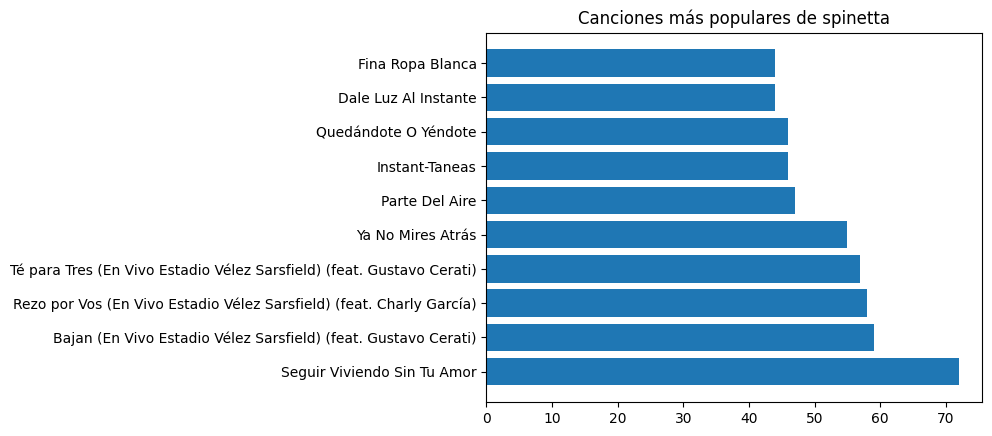

In [38]:
plt.barh(data=canciones_populares, y= 'Canción', width= 'Popularidad')
plt.title('Canciones más populares de spinetta')
plt.show()

Vamos a probar con otro artista para una futura comparacion

In [41]:
charly_id = obtenerID('Charly García')
df_charly = obtenerData(charly_id)

In [42]:
df_charly.head()

,Álbum,Tipo,Año,Canción,Artistas,Duración,Popularidad
0,Obras Cumbres,Álbum,2021,No Voy en Tren,Charly García,3.03,34
1,Obras Cumbres,Álbum,2021,Tu Amor,"Charly García, Pedro Aznar",3.11,33
2,Obras Cumbres,Álbum,2021,Hablando a Tu Corazón,"Charly García, Pedro Aznar",4.26,33
3,Obras Cumbres,Álbum,2021,Rezo por Vos,Charly García,4.48,33
4,Obras Cumbres,Álbum,2021,Me Siento Mucho Mejor,Charly García,3.08,32


In [43]:
df_charly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Álbum        284 non-null    object 
 1   Tipo         284 non-null    object 
 2   Año          284 non-null    object 
 3   Canción      284 non-null    object 
 4   Artistas     284 non-null    object 
 5   Duración     284 non-null    float64
 6   Popularidad  284 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 15.7+ KB


In [45]:
canciones_populares_charly = df_charly.sort_values(by='Popularidad', ascending=False).head(10)

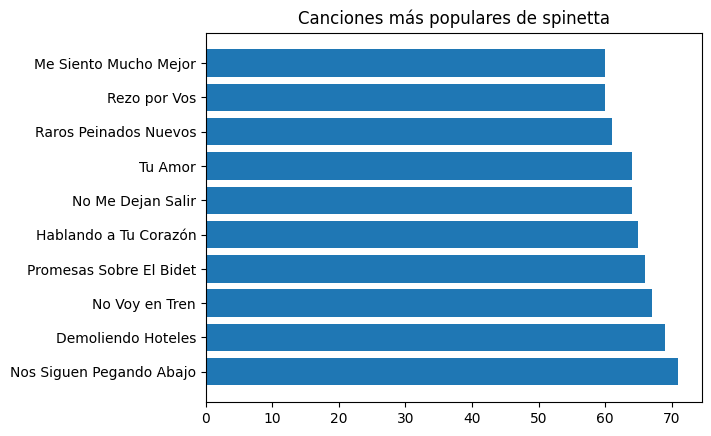

In [46]:
plt.barh(data=canciones_populares_charly, y= 'Canción', width= 'Popularidad')
plt.title('Canciones más populares de spinetta')
plt.show()

Me gustaría agregar una columna para el artista invitado

In [47]:
def obtener_invitado(artistas):
    if ',' in artistas:
        if artistas.split(', ')[1] != 'Luis Alberto Spinetta':
            # Si hay una coma en la cadena, separamos los artistas y tomamos el segundo elemento
            return artistas.split(', ')[1]
        else:
            return artistas.split(', ')[0]
    else:
        return None

In [48]:
df_spinetta['Invitado'] = df_spinetta['Artistas'].apply(obtener_invitado)

In [51]:
df_spinetta['Invitado'].value_counts()

Invitado
Fito Paez          25
Pescado Rabioso     7
Invisible           5
Gustavo Cerati      3
Almendra            3
Charly García       2
Ricardo Mollo       2
Juanse              1
Dante Spinetta      1
CACUCA              1
Name: count, dtype: int64

Funciona perfectamente, ahora se la aplicaremos a nuestro otro df antes de exportar la data para una posterior visualizacion en Power BI

In [52]:
df_charly['Invitado'] = df_charly['Artistas'].apply(obtener_invitado)

In [53]:
df_charly['Invitado'].value_counts()

Invitado
Pedro Aznar      24
Diego Dubarry     1
Name: count, dtype: int64

Exportamos para finalizar

In [58]:
df_spinetta.to_excel('SpinettaData.xlsx', index=False)
df_charly.to_excel('CharlyData.xlsx', index=False)